In [1]:
import sys

sys.path.append("../../code")

In [2]:
from tqdm.notebook import tqdm
import math
import pandas as pd
import seaborn as sns

from agents.Buyer.constants import CURIOSITY as epsilon_buyer
from agents.Seller.constants import CURIOSITY as epsilon_seller
from src.constants import NB_SELLERS
from src.simulate import get_new_agents, play_round
from display.__init__ import plot_avg_q_table, plot_avg_sub_q_tables, plot_prices, plot_epsilon

In [3]:
Verbose = False
NB_ROUNDS = 10000

sellers, buyers = get_new_agents(Verbose=Verbose)

for i in tqdm(range(NB_ROUNDS)):
    if Verbose:
        print(f"Round {i+1}\n------{'-'*len(str(i+1))}\n")
    sellers, buyers = play_round(sellers, buyers, Verbose=Verbose)
    if Verbose:
        print("============\n")

  0%|          | 0/10000 [00:00<?, ?it/s]

../../code\agents\Buyer\Buyer.py:135: RuntimeWarning: divide by zero encountered in longlong_scalars
  qty_lim = min(qty_left, self.budget_left // price)


# Seller

In [4]:
seller = sellers[0]

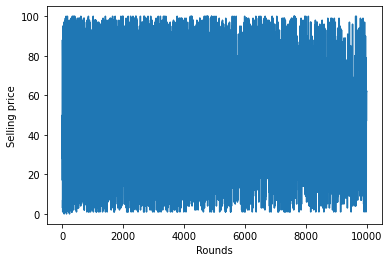

In [5]:
seller.plot_price()

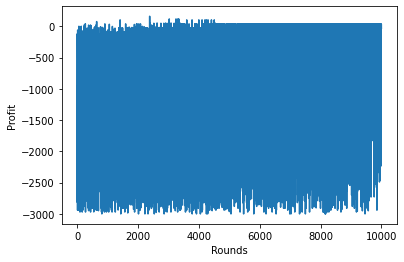

In [6]:
seller.plot_profit()

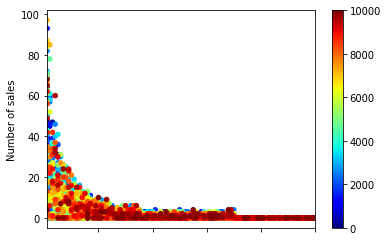

In [7]:
seller.plot_history()

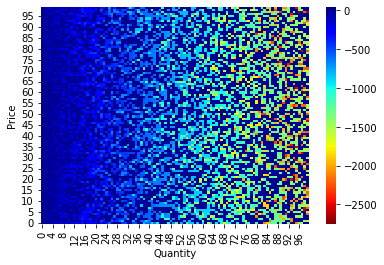

In [8]:
seller.plot_q_table()

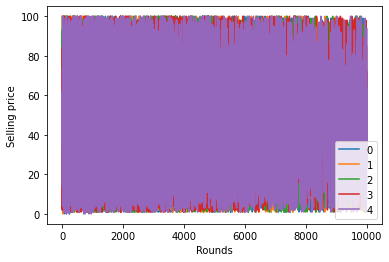

In [9]:
plot_prices(sellers)

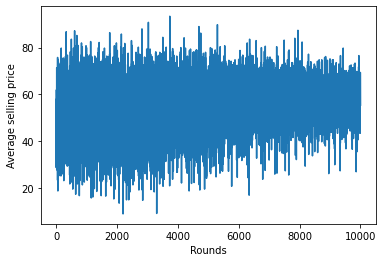

In [10]:
plot_prices(sellers, avg=True)

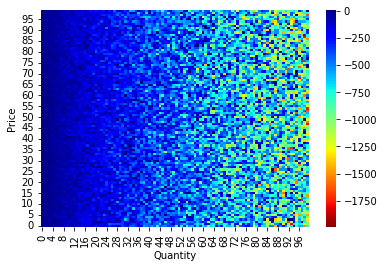

In [11]:
plot_avg_q_table(sellers)

In [12]:
seller.get_size_unk()

9801

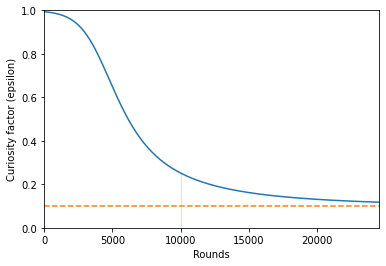

In [13]:
plot_epsilon(0.1, seller.get_size_unk(), NB_ROUNDS)

# Buyer

In [14]:
buyer = buyers[0]

In [15]:
# buyer.plot_history()

In [16]:
# buyer.plot_sub_q_tables()

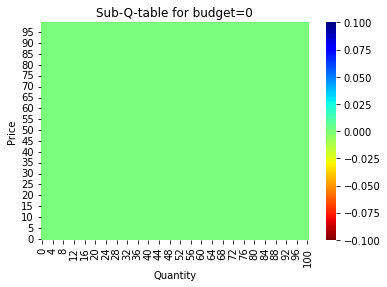

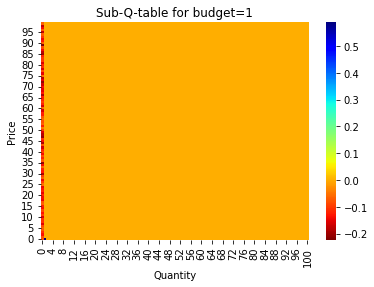

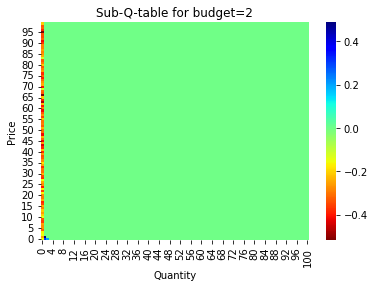

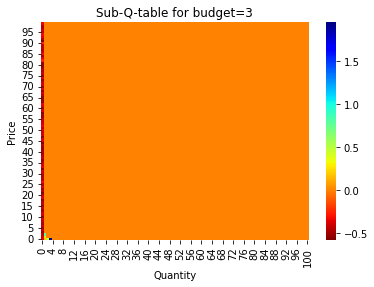

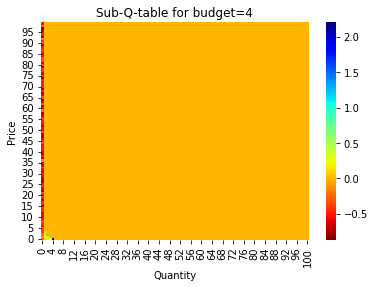

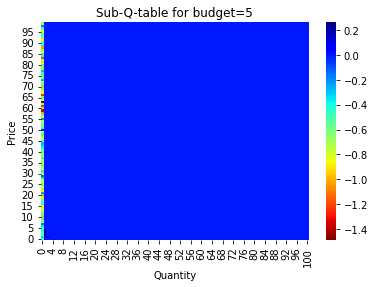

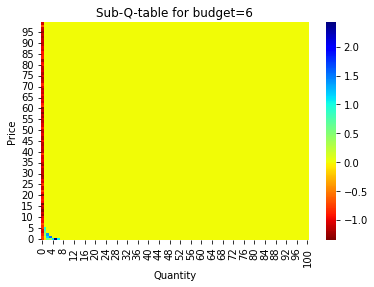

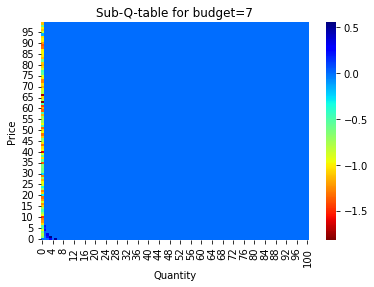

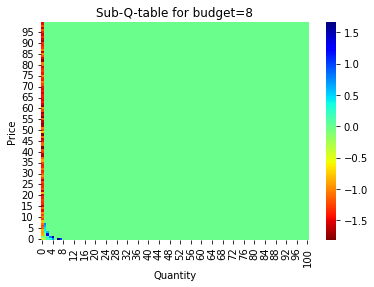

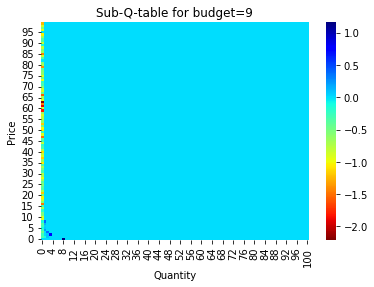

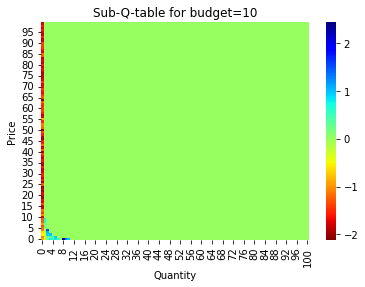

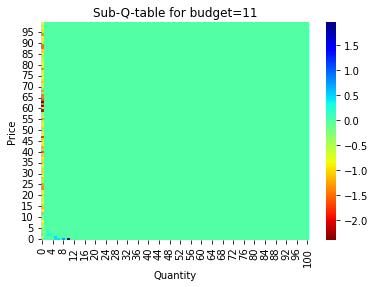

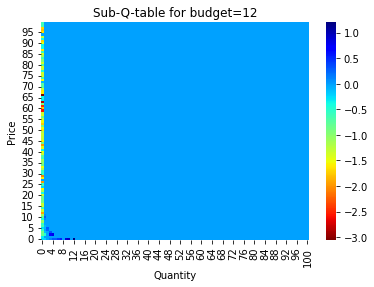

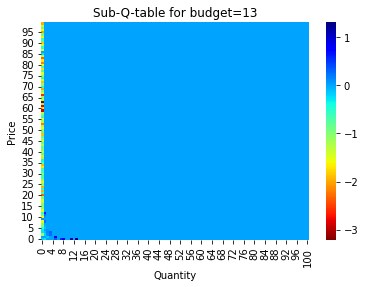

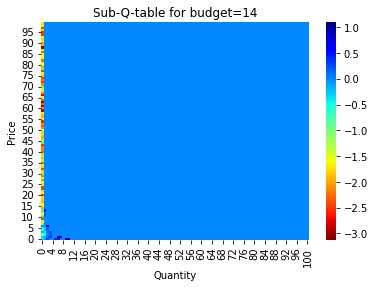

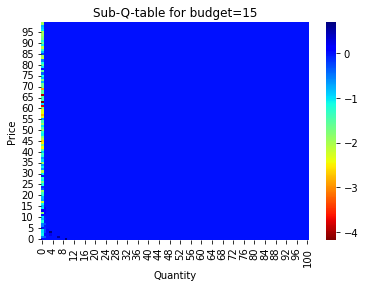

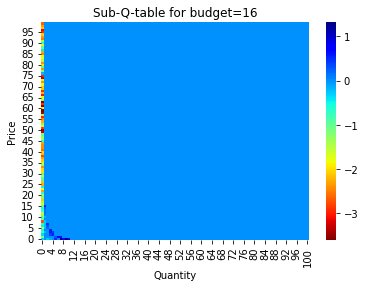

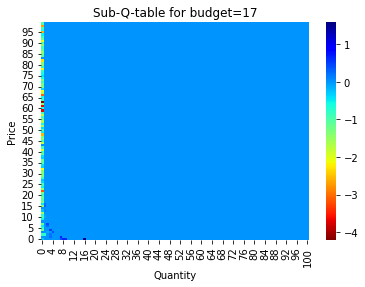

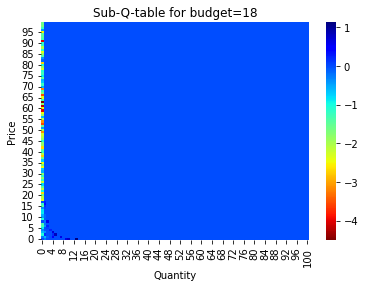

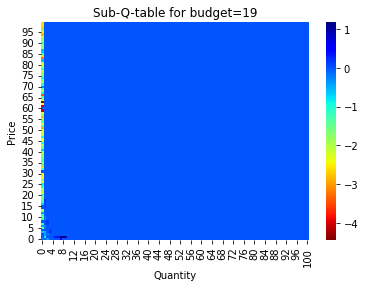

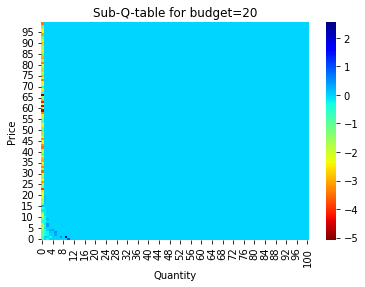

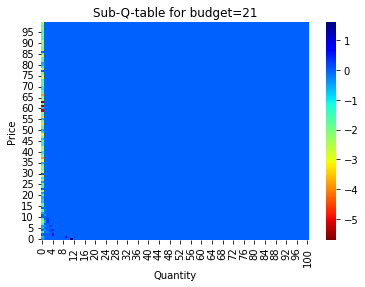

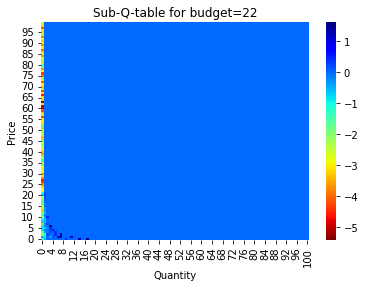

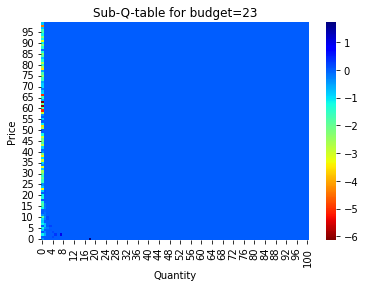

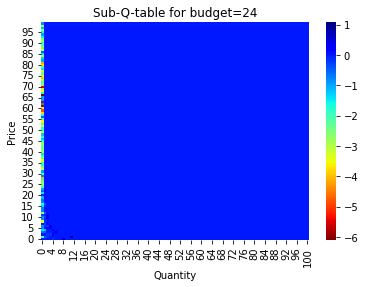

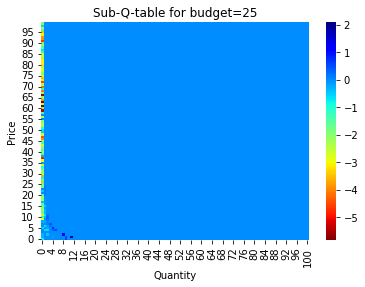

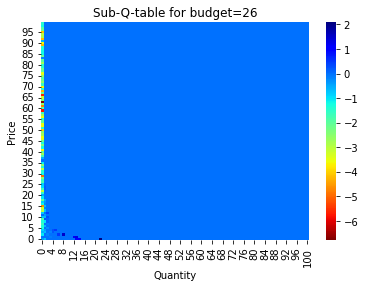

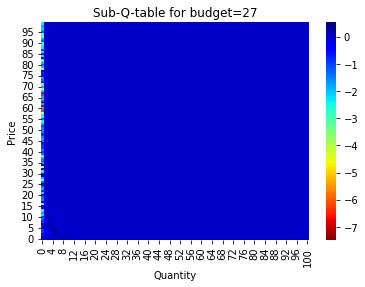

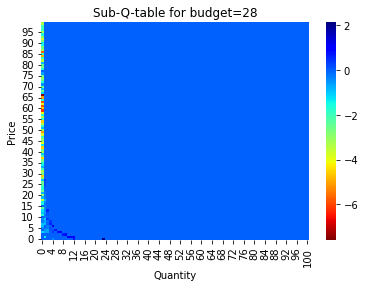

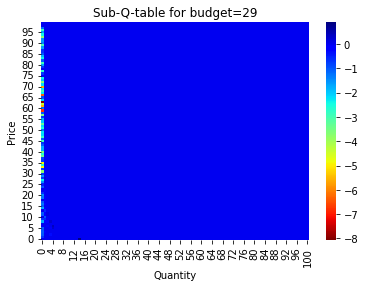

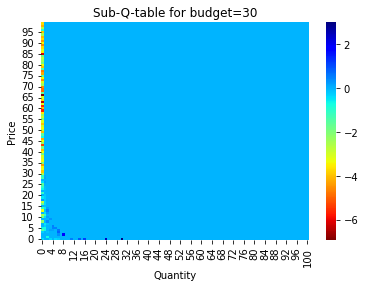

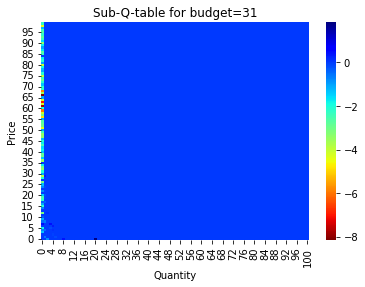

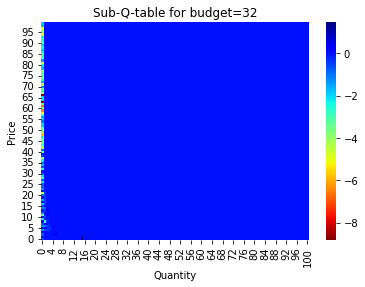

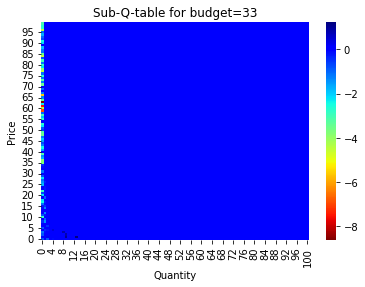

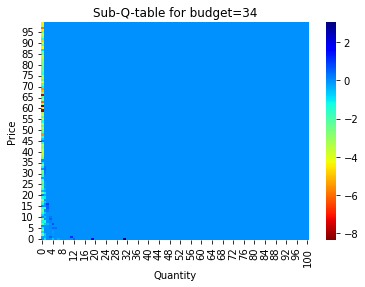

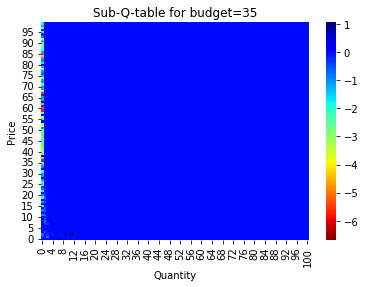

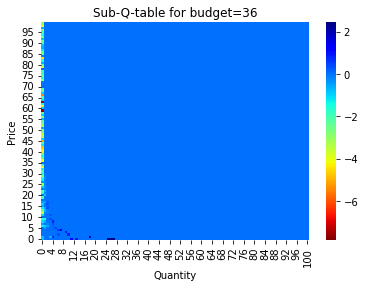

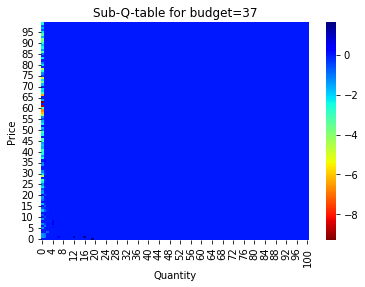

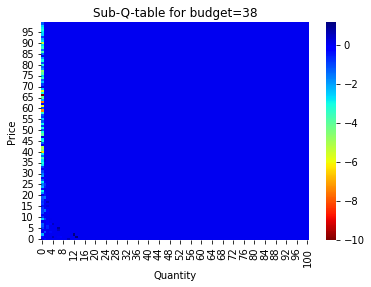

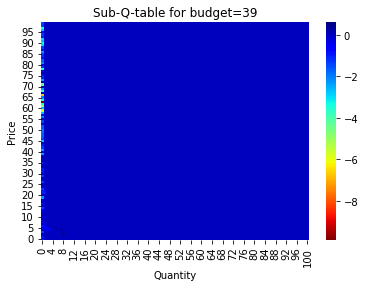

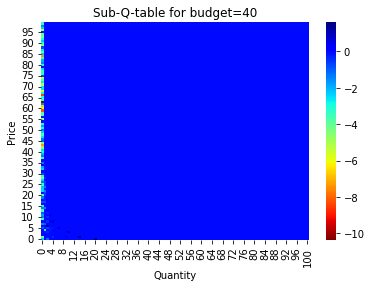

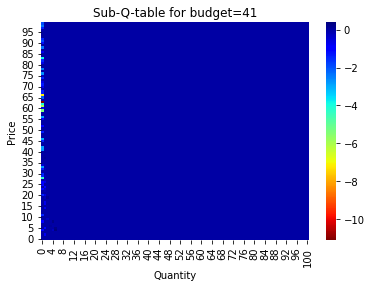

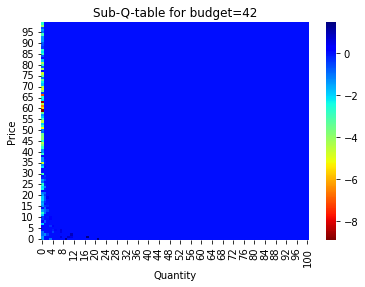

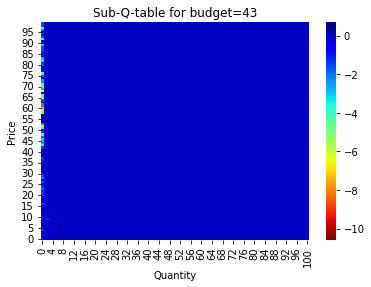

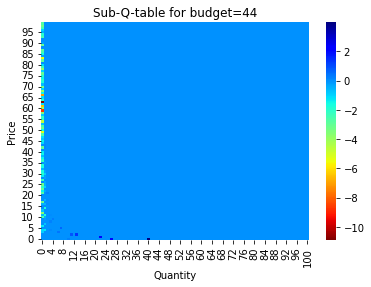

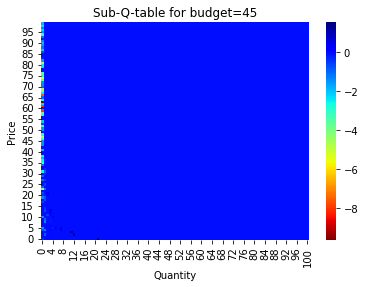

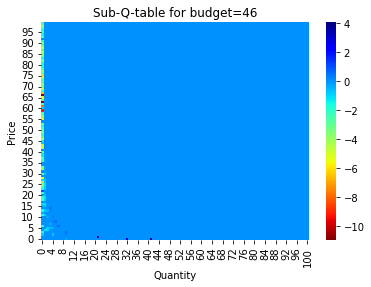

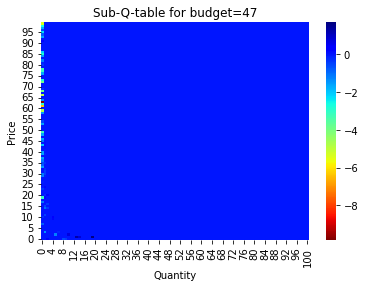

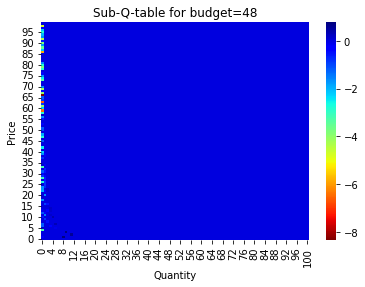

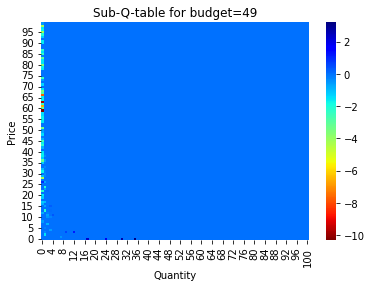

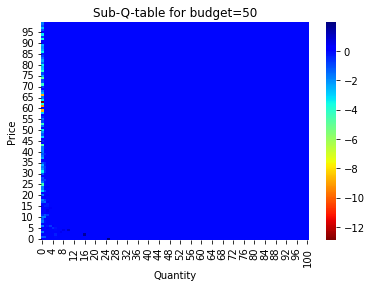

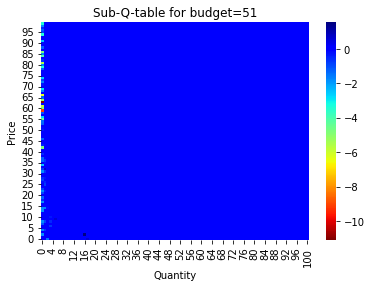

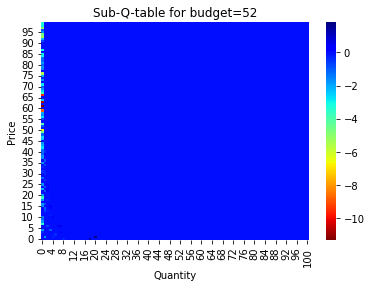

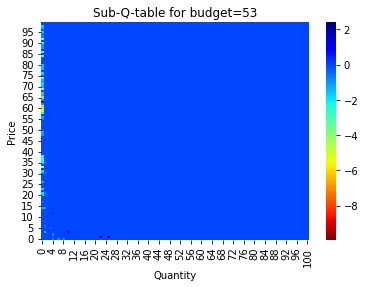

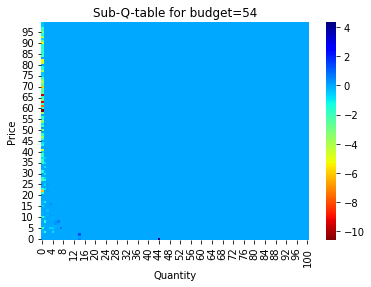

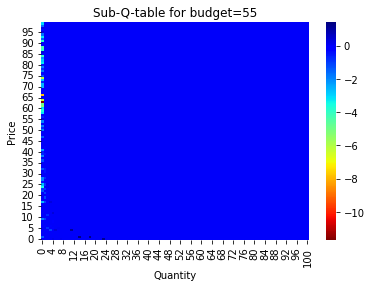

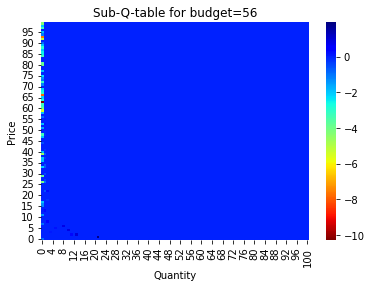

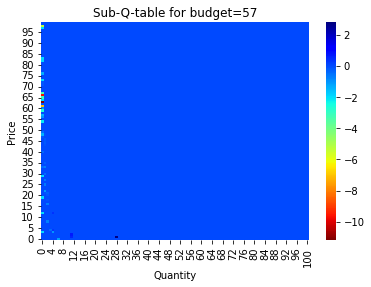

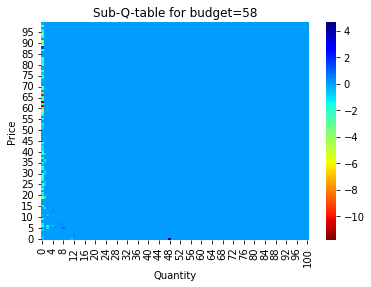

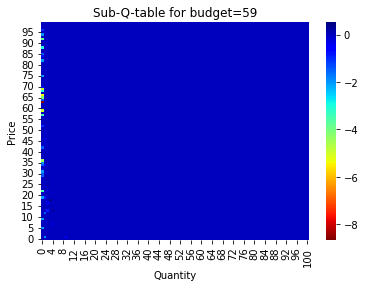

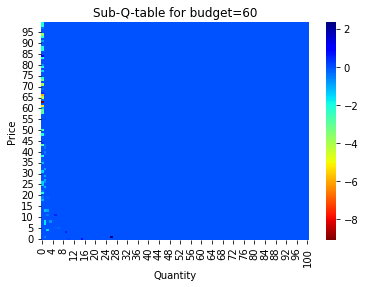

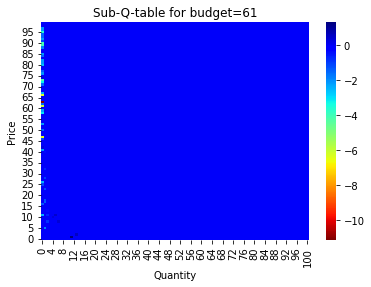

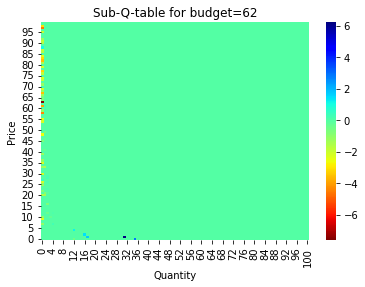

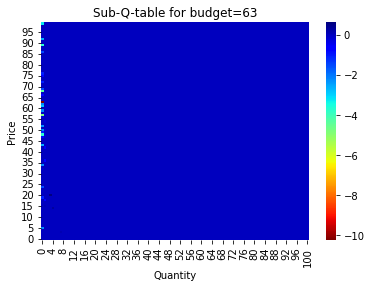

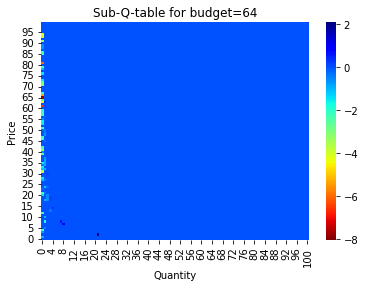

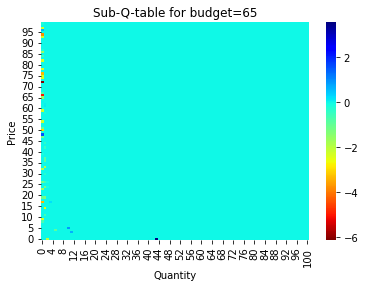

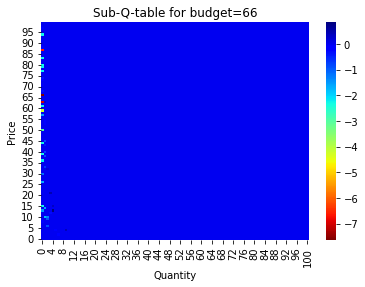

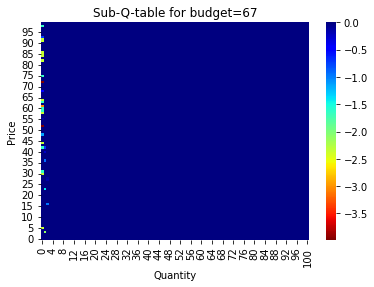

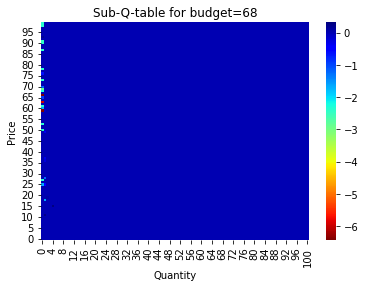

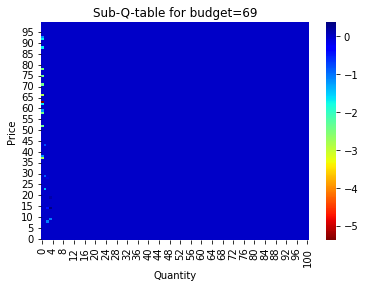

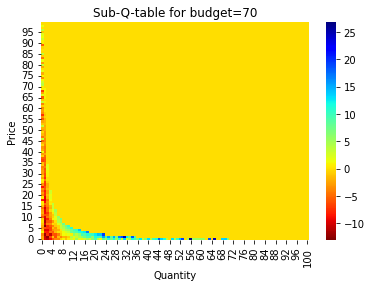

In [17]:
plot_avg_sub_q_tables(buyers)

In [18]:
buyer.get_size_unk()

31903

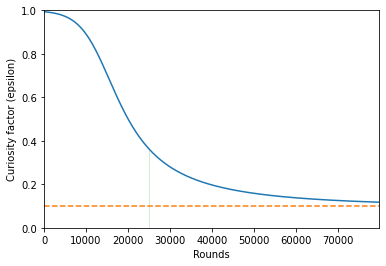

In [19]:
plot_epsilon(epsilon_buyer, buyer.get_size_unk(), math.floor(NB_ROUNDS * NB_SELLERS/2))

In [21]:
q_table = buyer.get_q_table()
q_table

array([[[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ]],

       [[  0.        ,   0.5       ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [ -0.125     ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [ -0.24688125,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        ...,


In [ ]:
q_table[q_table==0.] = None

In [22]:
q_table = buyer.get_q_table()
q_table

array([[[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ]],

       [[  0.        ,   0.5       ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [ -0.125     ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [ -0.24688125,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        ...,


<AxesSubplot:>

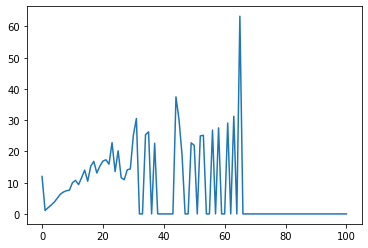

In [31]:
budget = buyer.budget
sns.lineplot(range(101), np.max(q_table[budget], axis=0))

In [29]:
np.max(q_table[budget], axis=0)

array([11.97698479,  1.0693788 ,  2.        ,  2.83222061,  3.74951396,
        4.99999996,  6.29638652,  6.99999958,  7.41667446,  7.59221183,
        9.99999999, 10.7323607 ,  9.37909   , 11.6117582 , 13.99999666,
       10.45625   , 15.27264063, 16.81201988, 13.09755125, 15.296     ,
       16.89219875, 17.32478125, 15.926375  , 22.81751445, 13.56945   ,
       20.19115612, 11.5946785 , 10.933115  , 14.127     , 14.3797    ,
       25.16812375, 30.5364293 ,  0.        ,  0.        , 25.356     ,
       26.25      ,  0.        , 22.60525   ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 37.4538225 ,
       30.19725   , 18.8       ,  0.        ,  0.        , 22.737     ,
       21.9639035 ,  0.        , 24.960975  , 25.16725   ,  0.        ,
        0.        , 26.7995    ,  0.        , 27.53      ,  0.        ,
        0.        , 29.075     ,  0.        , 31.2558775 ,  0.        ,
       63.25580078,  0.        ,  0.        ,  0.        ,  0.  